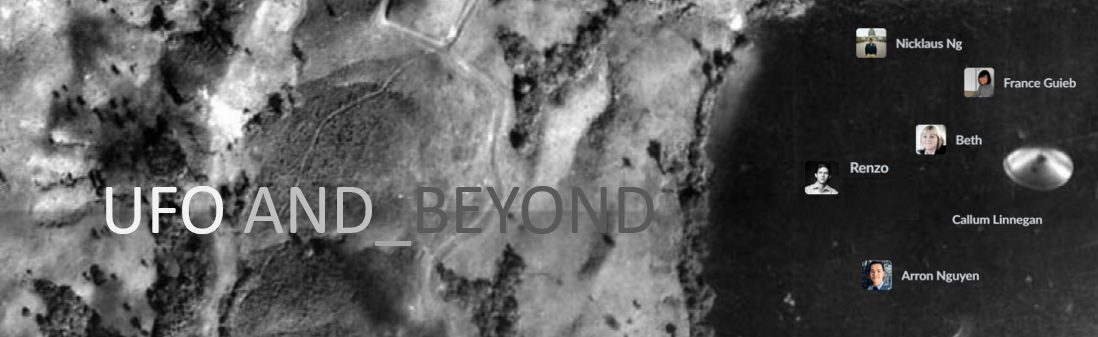

 #  ▌Ufo and_Beyond(1949-2019) ▌

In [3]:
# Dependencies
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import seaborn as sns
from plotnine import *
import maya
import dateutil.parser

###  Read Data

In [4]:
# Dataset
ufo_data= pd.read_csv('DATA/nuforc_reports.csv')
ufo_data.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


###  Data Cleanup

df.dropna() # Drop Nan values

In [23]:
ufo_data[['date_time']] = ufo_data.date_time.split("T",expand=True,)

AttributeError: 'Series' object has no attribute 'split'

In [5]:
nulvals = ufo_data.isnull().sum()
nulpct = (nulvals / len(ufo_data))*100
print(' Null Values (% of entries):')
print(round(nulpct.sort_values(ascending=False),2))

 Null Values (% of entries):
city_latitude     18.28
city_longitude    18.28
state              5.94
duration           3.60
shape              2.83
date_time          1.35
posted             1.35
city               0.27
text               0.06
stats              0.04
summary            0.03
report_link        0.00
dtype: float64


In [81]:
ufo_data.dtypes # identify data types

state                     object
date_time         datetime64[ns]
shape                     object
duration                  object
stats                     object
report_link               object
text                      object
posted                    object
city_latitude            float64
city_longitude           float64
dtype: object

In [6]:
# convert to type datetime
ufo_data['date_time'] = pd.to_datetime(ufo_data['date_time'], format='%Y-%m-%dT%H:%M:%S.%f')
ufo_data.dtypes

summary                   object
city                      object
state                     object
date_time         datetime64[ns]
shape                     object
duration                  object
stats                     object
report_link               object
text                      object
posted                    object
city_latitude            float64
city_longitude           float64
dtype: object

In [22]:
ufo_data.dropna()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
5,"The object has flashing lights that are green,...",Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
6,Description is the same as Washington DC event...,Tucson,AZ,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...
88119,there was a stationary orange light in the eas...,Morgan City,LA,2019-10-02 19:15:00,light,2 minutes,Occurred : 10/2/2019 19:15 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149421.html,there was a stationary orange light in the eas...,2019-10-04T00:00:00,29.699692,-91.069123
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280


###  Looking for inside trends

In [8]:
ufo_data.describe()

,city_latitude,city_longitude
count,72013.000000,72013.000000
mean,38.550953,-94.469395
std,5.707888,18.127564
min,-32.055500,-170.494000
25%,34.164800,-112.049460
50%,39.127175,-88.144270
75%,42.203500,-80.173166
max,64.845276,116.000000


In [84]:
ufo_data[['date_time']] = ufo_data.date_time.split("T",expand=True,)

AttributeError: 'Series' object has no attribute 'split'

### What were the shapes recorded?
There is a variety of descriptions of the shapes. The shapes are most frequently described as lights, circles or triangles.

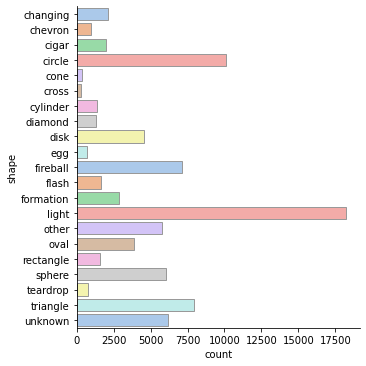

In [9]:
sns.catplot(y="shape", kind="count",
            palette="pastel", edgecolor=".6",
            data=ufo_data.sort_values("shape"))

In [72]:
plt.figure(figsize=(6, 8))
splot = sns.barplot(data=ufo_data.sort_values("shape")), x = 'count', y = 'shape'))
for p in splot.patches:
splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

SyntaxError: unmatched ')' (<ipython-input-72-928d8ee00f00>, line 2)

C:\Users\zaax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'UFOs are of various shapes')

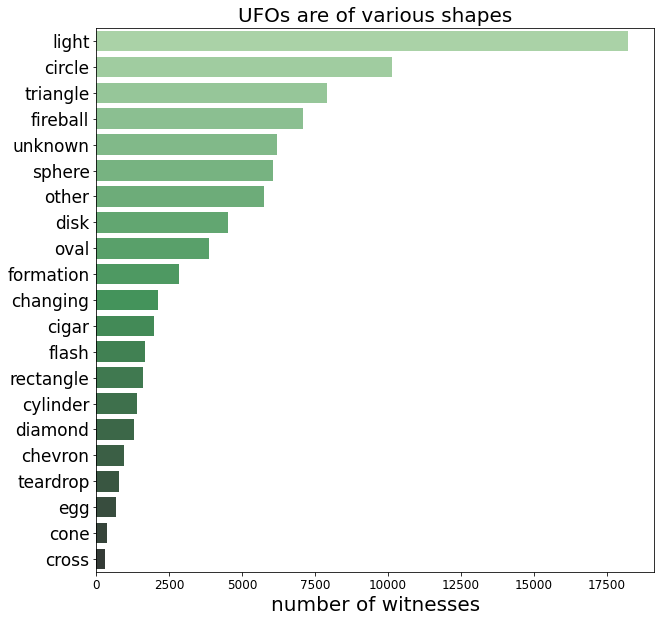

In [10]:
temp = ufo_data['shape'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(temp, temp.index, palette="Greens_d")
plt.yticks(fontsize=17)
plt.xticks(fontsize=12)
plt.xlabel("number of witnesses", fontsize=20)
plt.title("UFOs are of various shapes", fontsize=20)

In [17]:
# CHANGE VARIABLES UFO_DATE IN SCRIPT 1-1-18
ufo_date = ufo_data.date_time.replace('24:00', '00:00')  # clean illegal values
ufo_date = ufo_data.to_date_time(ufo_date, format='%m/%d/%Y %H:%M')  # now in datetime

ufo_data['date_time'] = ufo_data.date_time.replace('24:00', '00:00')
ufo_data['date_time'] = pd.to_date_time(ufo_data['date_time'], format='%m/%d/%Y %H:%M')

AttributeError: 'DataFrame' object has no attribute 'to_date_time'

KeyError: 60

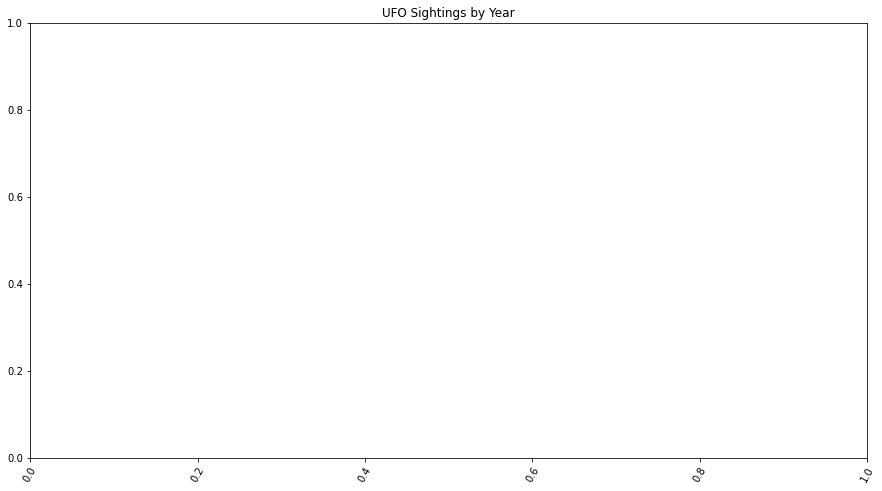

In [21]:
ufo_yr = ufo_date.dt.year  # series with the year exclusively

## Set axes ##
years_data = ufo_yr.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data
## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")